#Robos en la CDMX

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import libpysal as lps
import esda

# **DATOS**

En esta seccion se obtienen los datos

## **DELITOS**

In [29]:
delitos_cdmx= pd.read_csv('delitos-cdmx.csv')

In [30]:
delitos_cdmx

,Año,Clave,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,9002,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,4,0.0,3.0,4.0,6.0,1.0,1.0,2.0,5.0,1.0,2.0,3.0
1,2015,9002,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2015,9002,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,2,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
3,2015,9002,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,9002,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675,2024,9017,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,5,8.0,5.0,9.0,12.0,11.0,17.0,11.0,16.0,17.0,12.0,9.0
15676,2024,9017,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,4,6.0,4.0,5.0,3.0,0.0,3.0,4.0,4.0,2.0,3.0,4.0
15677,2024,9017,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,8,14.0,12.0,15.0,22.0,14.0,16.0,10.0,14.0,11.0,14.0,15.0
15678,2024,9017,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,0.0,0.0,5.0,12.0,22.0,2.0,0.0,0.0,2.0,0.0,0.0


In [4]:
#  keep only Año=2024
delitos_cdmx=delitos_cdmx[delitos_cdmx['Año']==2024]
delitos_cdmx=delitos_cdmx.drop(columns=['Año'])

In [31]:
robos_cdmx=delitos_cdmx[delitos_cdmx['Tipo de delito']=='Homicidio']

In [32]:
# sum the robos by Cve. Municipio
robos_cdmx=robos_cdmx.groupby(['Clave']).sum().reset_index()

C:\Users\herie\AppData\Local\Temp\ipykernel_24404\3881745997.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  robos_cdmx=robos_cdmx.groupby(['Clave']).sum().reset_index()


In [33]:
robos_cdmx

,Clave,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,9002,181755,56,47.0,67.0,59.0,45.0,45.0,48.0,37.0,49.0,52.0,63.0,57.0
1,9003,181755,63,68.0,64.0,55.0,60.0,60.0,59.0,44.0,46.0,60.0,60.0,66.0
2,9004,181755,19,15.0,27.0,25.0,27.0,23.0,26.0,25.0,27.0,18.0,24.0,30.0
3,9005,181755,203,185.0,199.0,222.0,237.0,187.0,180.0,180.0,191.0,186.0,198.0,223.0
4,9006,181755,62,48.0,52.0,47.0,69.0,46.0,59.0,48.0,61.0,44.0,65.0,71.0
5,9007,181755,280,276.0,310.0,297.0,295.0,269.0,275.0,261.0,282.0,316.0,294.0,315.0
6,9008,181755,17,18.0,17.0,14.0,19.0,20.0,20.0,27.0,15.0,23.0,20.0,18.0
7,9009,181755,16,20.0,13.0,19.0,17.0,16.0,17.0,14.0,17.0,31.0,15.0,25.0
8,9010,181755,95,82.0,105.0,91.0,83.0,107.0,88.0,91.0,93.0,95.0,89.0,102.0
9,9011,181755,45,54.0,60.0,67.0,57.0,50.0,57.0,50.0,48.0,54.0,61.0,66.0


## **SHAPE**

In [34]:
mun=gpd.read_file('mun-cdmx.gpkg')

In [35]:
mun

,Clave,Municipio,geometry
0,9002,Azcapotzalco,"POLYGON ((2794859.977 837218.408, 2794861.69 8..."
1,9003,Coyoacán,"POLYGON ((2800218.995 820661.624, 2800250.439 ..."
2,9004,Cuajimalpa de Morelos,"POLYGON ((2787229.79 825329.285, 2787272.744 8..."
3,9005,Gustavo A. Madero,"POLYGON ((2802175.66 843326.718, 2801806.564 8..."
4,9006,Iztacalco,"POLYGON ((2808145.908 826363.205, 2808144.575 ..."
5,9007,Iztapalapa,"POLYGON ((2812453.035 823708.051, 2812495.143 ..."
6,9008,La Magdalena Contreras,"POLYGON ((2792518.205 818323.067, 2792478.173 ..."
7,9009,Milpa Alta,"POLYGON ((2814877.4 806710.534, 2814871.827 80..."
8,9010,Álvaro Obregón,"POLYGON ((2794395.922 824857.553, 2794434.245 ..."
9,9011,Tláhuac,"POLYGON ((2816579.32 817395.961, 2816605.02 81..."


## **POBLACION**

In [36]:
poblacion= pd.read_csv('poblacion-cdmx.csv')

In [37]:
poblacion

,Clave,Municipio,Poblacion Total,Poblacion Femenina,Poblacion Masculina
0,9002,Azcapotzalco,432205,227255,204950
1,9003,Coyoacán,614447,325337,289110
2,9004,Cuajimalpa de Morelos,217686,113537,104149
3,9005,Gustavo A. Madero,1173351,609477,563874
4,9006,Iztacalco,404695,212343,192352
5,9007,Iztapalapa,1835486,947835,887651
6,9008,La Magdalena Contreras,247622,129335,118287
7,9009,Milpa Alta,152685,78314,74371
8,9010,Álvaro Obregón,759137,398130,361007
9,9011,Tláhuac,392313,202123,190190


In [38]:
# drop columns 
poblacion = poblacion.drop(columns=["Poblacion Femenina", "Poblacion Masculina", "Municipio"])

In [39]:
poblacion

,Clave,Poblacion Total
0,9002,432205
1,9003,614447
2,9004,217686
3,9005,1173351
4,9006,404695
5,9007,1835486
6,9008,247622
7,9009,152685
8,9010,759137
9,9011,392313


## **MERGE**

In [40]:
# merge the dataframes
robos_cdmx=robos_cdmx.merge(poblacion, left_on='Clave', right_on='Clave', how='left')

In [41]:
robos_cdmx

,Clave,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Poblacion Total
0,9002,181755,56,47.0,67.0,59.0,45.0,45.0,48.0,37.0,49.0,52.0,63.0,57.0,432205
1,9003,181755,63,68.0,64.0,55.0,60.0,60.0,59.0,44.0,46.0,60.0,60.0,66.0,614447
2,9004,181755,19,15.0,27.0,25.0,27.0,23.0,26.0,25.0,27.0,18.0,24.0,30.0,217686
3,9005,181755,203,185.0,199.0,222.0,237.0,187.0,180.0,180.0,191.0,186.0,198.0,223.0,1173351
4,9006,181755,62,48.0,52.0,47.0,69.0,46.0,59.0,48.0,61.0,44.0,65.0,71.0,404695
5,9007,181755,280,276.0,310.0,297.0,295.0,269.0,275.0,261.0,282.0,316.0,294.0,315.0,1835486
6,9008,181755,17,18.0,17.0,14.0,19.0,20.0,20.0,27.0,15.0,23.0,20.0,18.0,247622
7,9009,181755,16,20.0,13.0,19.0,17.0,16.0,17.0,14.0,17.0,31.0,15.0,25.0,152685
8,9010,181755,95,82.0,105.0,91.0,83.0,107.0,88.0,91.0,93.0,95.0,89.0,102.0,759137
9,9011,181755,45,54.0,60.0,67.0,57.0,50.0,57.0,50.0,48.0,54.0,61.0,66.0,392313


In [42]:
robos_cdmx['Clave'].astype(str)

0     9002
1     9003
2     9004
3     9005
4     9006
5     9007
6     9008
7     9009
8     9010
9     9011
10    9012
11    9013
12    9014
13    9015
14    9016
15    9017
Name: Clave, dtype: object

In [43]:
robos_cdmx['Clave'] = robos_cdmx['Clave'].astype(str)

In [44]:
robos_cdmx=robos_cdmx.merge(mun, left_on='Clave', right_on='Clave', how='left')

In [45]:
robos_cdmx.head()

,Clave,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Poblacion Total,Municipio,geometry
0,9002,181755,56,47.0,67.0,59.0,45.0,45.0,48.0,37.0,49.0,52.0,63.0,57.0,432205,Azcapotzalco,"POLYGON ((2794859.977 837218.408, 2794861.69 8..."
1,9003,181755,63,68.0,64.0,55.0,60.0,60.0,59.0,44.0,46.0,60.0,60.0,66.0,614447,Coyoacán,"POLYGON ((2800218.995 820661.624, 2800250.439 ..."
2,9004,181755,19,15.0,27.0,25.0,27.0,23.0,26.0,25.0,27.0,18.0,24.0,30.0,217686,Cuajimalpa de Morelos,"POLYGON ((2787229.79 825329.285, 2787272.744 8..."
3,9005,181755,203,185.0,199.0,222.0,237.0,187.0,180.0,180.0,191.0,186.0,198.0,223.0,1173351,Gustavo A. Madero,"POLYGON ((2802175.66 843326.718, 2801806.564 8..."
4,9006,181755,62,48.0,52.0,47.0,69.0,46.0,59.0,48.0,61.0,44.0,65.0,71.0,404695,Iztacalco,"POLYGON ((2808145.908 826363.205, 2808144.575 ..."


## **ROBOS EN UN AÑO Y ROBOS POR CADA 10 MIL HABITANTES**

In [46]:
robos_cdmx['Total Año']=robos_cdmx[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                      'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)

In [47]:
robos_cdmx['Robos por cada 10 mil habitantes']=robos_cdmx['Total Año']/robos_cdmx['Poblacion Total']*10000

In [48]:
robos_cdmx=gpd.GeoDataFrame(robos_cdmx, geometry='geometry')

In [57]:
robos_cdmx.head()

,Clave,Municipio,Poblacion Total,Total Año,Robos por cada 10 mil habitantes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,geometry
0,9002,Azcapotzalco,432205,625.0,14.460730,56,47.0,67.0,59.0,45.0,45.0,48.0,37.0,49.0,52.0,63.0,57.0,"POLYGON ((2794859.977 837218.408, 2794861.69 8..."
1,9003,Coyoacán,614447,705.0,11.473732,63,68.0,64.0,55.0,60.0,60.0,59.0,44.0,46.0,60.0,60.0,66.0,"POLYGON ((2800218.995 820661.624, 2800250.439 ..."
2,9004,Cuajimalpa de Morelos,217686,286.0,13.138190,19,15.0,27.0,25.0,27.0,23.0,26.0,25.0,27.0,18.0,24.0,30.0,"POLYGON ((2787229.79 825329.285, 2787272.744 8..."
3,9005,Gustavo A. Madero,1173351,2391.0,20.377534,203,185.0,199.0,222.0,237.0,187.0,180.0,180.0,191.0,186.0,198.0,223.0,"POLYGON ((2802175.66 843326.718, 2801806.564 8..."
4,9006,Iztacalco,404695,672.0,16.605098,62,48.0,52.0,47.0,69.0,46.0,59.0,48.0,61.0,44.0,65.0,71.0,"POLYGON ((2808145.908 826363.205, 2808144.575 ..."


In [ ]:
# sort the columns
robos_cdmx=robos_cdmx[['Clave', 'Municipio', 'Poblacion Total', 'Total Año', 'Robos por cada 10 mil habitantes', 
                       'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre',
                          'geometry']]

KeyError: "['Homicidios por cada 10 mil habitantes'] not in index"

In [60]:
# change the name of the column
robos_cdmx = robos_cdmx.rename(columns={'Robos por cada 10 mil habitantes': 'Homicidios por cada 10 mil habitantes'})

In [61]:
# export to geopackage
robos_cdmx.to_file('homicidios-cdmx.gpkg', layer='homicidios-cdmx', driver='GPKG')

# **Visualizacion de Datos**

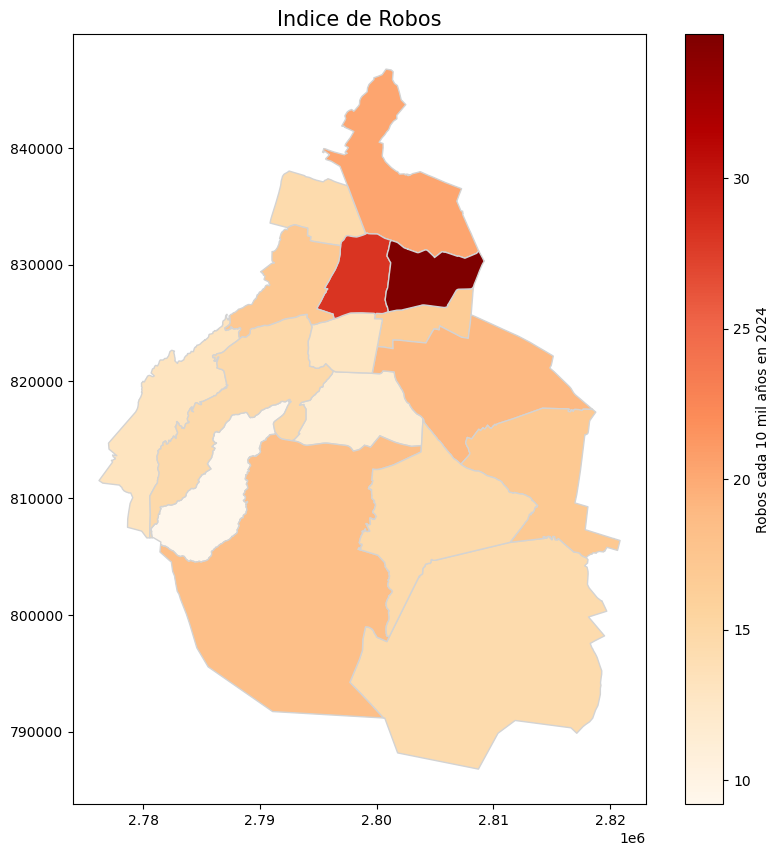

In [52]:
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

robos_cdmx.plot(column='Robos por cada 10 mil habitantes', ax=ax, legend=True, edgecolor="lightgray",
                 legend_kwds={"label": "Robos cada 10 mil años en 2024"},
                 cmap="OrRd",
                 missing_kwds={"color": "green", "label": "Sin datos"})

plt.title("Indice de Robos", fontsize=15)

# Mostrar el mapa
plt.show()

##Analisis Moran

In [53]:

# **1. Crear matriz de pesos espaciales basada en vecinos**
w = lps.weights.Queen.from_dataframe(robos_cdmx)
w.transform = "r"  # Normalización de los pesos

# **2. Calcular el Índice de Moran**
y = robos_cdmx["Total Año"].values  # Variable de análisis
moran = esda.Moran(y, w)

# **3. Imprimir resultados**
print(f"Índice de Moran: {moran.I}")
print(f"p-valor: {moran.p_sim}")  # Si p < 0.05, hay autocorrelación significativa

Índice de Moran: -0.12355591945910965
p-valor: 0.383


C:\Users\herie\AppData\Local\Temp\ipykernel_24404\3632740265.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(robos_cdmx)


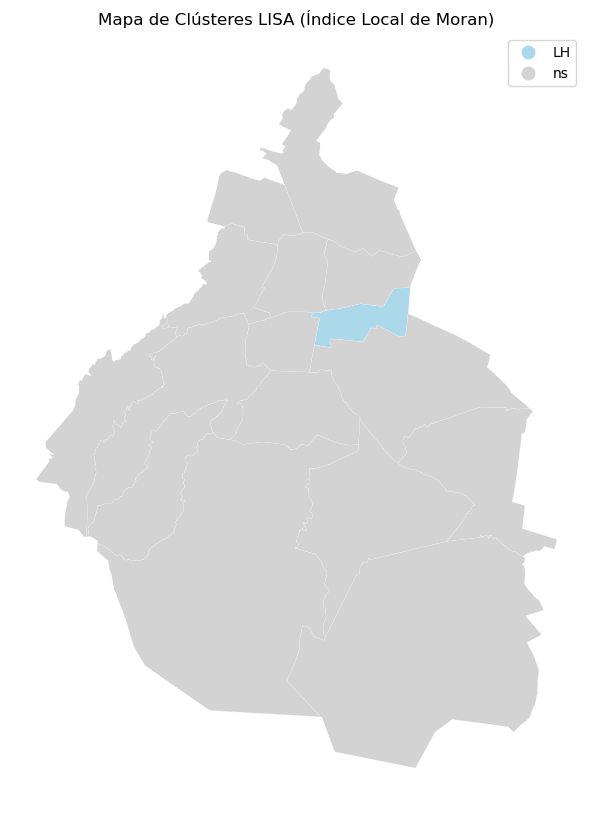

In [54]:
import esda
from splot.esda import lisa_cluster

# Calcular el Índice Local de Moran (LISA)
lisa = esda.Moran_Local(y, w)

# Crear el mapa de clusters LISA
fig, ax = plt.subplots(1, figsize=(10, 10))
lisa_cluster(lisa, robos_cdmx, p=0.05, ax=ax)
ax.set_title("Mapa de Clústeres LISA (Índice Local de Moran)")
plt.show()

In [55]:
from esda.moran import Moran_BV

# Seleccionar variables para comparar
y1 = robos_cdmx["Enero"].values
y2 = robos_cdmx["Julio"].values

# Calcular Índice de Moran Bivariado
moran_bv = Moran_BV(y1, y2, w)

print(f"Índice de Moran Bivariado: {moran_bv.I}")
print(f"p-valor: {moran_bv.p_sim}")

Índice de Moran Bivariado: -0.08610954181596897
p-valor: 0.278
